This notebook provides code to read compositions from the `activephasemap` run and save them into a csv file to transfer it onto a OT2

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# specify min, max bounds for all the components
bounds = np.asarray([(0.0, 35.0), (0.0, 35.0)]).T 
# specify iteration number for reading and saving files
ITERATION = 15

In [2]:
# specify the constant volumes of components that are not varied in µL
CTAB = 96
GCH = 59
GS = 24 

In [3]:
comps = np.load('./data/comps_%d.npy'%ITERATION)
n_samples = len(comps)
SN = np.round(comps[:,0].reshape(-1,1)).astype(int)
AA = np.round(comps[:,1].reshape(-1,1)).astype(int)

In [4]:
CTAB_ = np.array([CTAB]*n_samples).reshape(-1,1)
GCH_ = np.array([GCH]*n_samples).reshape(-1,1)
GS = np.array([GS]*n_samples).reshape(-1,1)

volumes = np.hstack((CTAB_, GCH_, AA, SN, GS))
WATER = 300 - np.sum(volumes, axis=1).reshape(-1,1)
volumes_ = np.hstack((CTAB_, WATER, GCH_, AA, SN, GS))
volume_df = pd.DataFrame(volumes_, columns=['CTAB', 'Water', 'GCH', 'AA', 'SN', 'GS'])
volume_df

,CTAB,Water,GCH,AA,SN,GS
0,96,86,59,35,0,24
1,96,78,59,23,20,24
2,96,86,59,1,34,24
3,96,82,59,22,17,24
4,96,103,59,13,5,24
5,96,63,59,34,24,24
6,96,89,59,11,21,24
7,96,89,59,29,3,24
8,96,106,59,6,9,24
9,96,69,59,24,28,24


In [5]:
print("Total volumes needed : \n", volume_df.sum())

Total volumes needed : 
 CTAB     4800
Water    4293
GCH      2950
AA        897
SN        860
GS       1200
dtype: int64


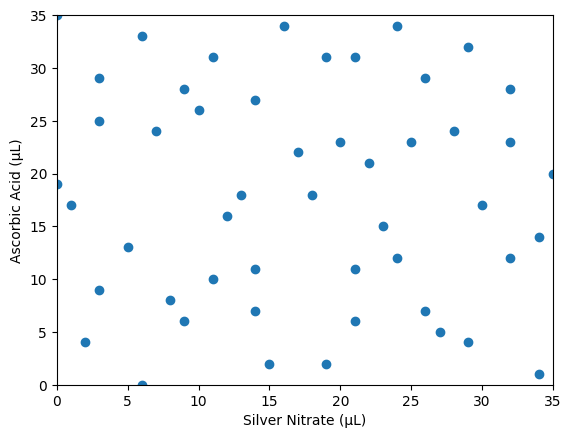

In [6]:
fig, ax = plt.subplots()
ax.scatter(volume_df["SN"], volume_df["AA"])
ax.set_xlim([bounds[0,0], bounds[1,0]])
ax.set_ylim([bounds[0,1], bounds[1,1]])
ax.set_xlabel("Silver Nitrate (µL)")
ax.set_ylabel("Ascorbic Acid (µL)")
plt.show()

In [7]:
volume_df.to_csv('./opentrons/volumes_%d.csv'%(ITERATION),index=False)